In [4]:
import csv
import pandas as pd
from ctrace import PROJECT_ROOT
import seaborn as sns
import numpy as np
from scipy.stats import skew
run_id = "run_jaCJw"
path = PROJECT_ROOT / "output" / run_id

# Process grader.csv
with open(path / 'grader.csv', "r") as f:
    grader = pd.read_csv(f, skiprows = 1,header = None, index_col=0)

# Process each row to numpy array
grader["grader_data"] = grader.apply(lambda r: tuple(r), axis=1).apply(np.array)
grader = grader[["grader_data"]]
grader.reset_index(inplace=True)
grader = grader.rename(columns = {0:'id'})

# process main data
with open(path / 'main.csv', "r") as f:
    main = pd.read_csv(f)
    
# process params
with open(path / 'input.csv', "r") as f:
    params = pd.read_csv(f)
df = params
df = pd.merge(df, main, how="left", on=["id", "id"])
df = pd.merge(df, grader, how="left", on=["id", "id"])
df["grader_skew"] = df["grader_data"].apply(lambda x: skew(x))

In [5]:
df.head()

,id,width,r,sparsity,num_infected,transmission_rate,compliance_rate,structure_rate,budget,method,num_samples,eval_num_samples,eval_aggregation_method,seed,saa_objective_value,grader_objective_value,greedy_objective_value,random_objective_value,grader_data,grader_skew
0,0,50,1.1,0.1,50,0.15,0.9,0.0,100,SAA,100,100,max,15795,15.0,15.0,24.0,32.0,"[13.0, 13.0, 10.0, 12.0, 14.0, 10.0, 10.0, 15....",-0.953642
1,1,50,1.1,0.1,50,0.15,0.9,0.0,100,SAA,100,100,max,860,12.0,12.0,21.0,27.0,"[12.0, 7.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0...",-1.522134
2,2,50,1.1,0.1,50,0.15,0.9,0.0,100,SAA,100,100,max,76820,13.0,13.0,22.0,30.0,"[9.0, 5.0, 12.0, 11.0, 12.0, 8.0, 11.0, 10.0, ...",-1.235668
3,3,50,1.1,0.1,50,0.15,0.9,0.0,100,SAA,100,100,max,54886,12.0,12.0,23.0,25.0,"[12.0, 10.0, 12.0, 11.0, 10.0, 10.0, 5.0, 12.0...",-1.457147
4,4,50,1.1,0.1,50,0.15,0.9,0.0,100,SAA,100,100,max,6265,13.0,13.0,18.0,28.0,"[13.0, 12.0, 12.0, 13.0, 13.0, 9.0, 11.0, 13.0...",-1.112437


In [6]:
# dfd = df.drop(columns=['grader_data'])
# sns.pairplot(dfd)

Error in callback <function flush_figures at 0x7f637747e550> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:ylabel='Count'>

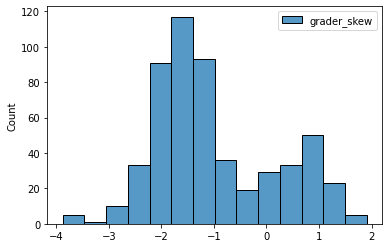

In [9]:
sns.histplot(df[["grader_skew"]])